In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv("INR-USD.csv")

print(data.head())

         Date       Open       High        Low      Close  Adj Close  Volume
0  2003-12-01  45.709000  45.728001  45.449001  45.480000  45.480000     0.0
1  2003-12-08  45.474998  45.507999  45.352001  45.451000  45.451000     0.0
2  2003-12-15  45.450001  45.500000  45.332001  45.455002  45.455002     0.0
3  2003-12-22  45.417000  45.549000  45.296001  45.507999  45.507999     0.0
4  2003-12-29  45.439999  45.645000  45.421001  45.560001  45.560001     0.0


In [42]:
print(data.isnull().sum())

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64


In [43]:
data = data.dropna()

In [44]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [45]:
print(data.describe())

              Open         High          Low        Close    Adj Close  Volume
count  1013.000000  1013.000000  1013.000000  1013.000000  1013.000000  1013.0
mean     58.035208    58.506681    57.654706    58.056509    58.056509     0.0
std      12.614635    12.716632    12.565279    12.657407    12.657407     0.0
min      38.995998    39.334999    38.979000    39.044998    39.044998     0.0
25%      45.508999    45.775002    45.231998    45.498001    45.498001     0.0
50%      59.702999    60.342999    59.209999    59.840000    59.840000     0.0
75%      68.508499    69.099998    68.250000    68.538002    68.538002     0.0
max      82.917999    83.386002    82.563004    82.932999    82.932999     0.0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013 entries, 0 to 1015
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1013 non-null   object 
 1   Open       1013 non-null   float64
 2   High       1013 non-null   float64
 3   Low        1013 non-null   float64
 4   Close      1013 non-null   float64
 5   Adj Close  1013 non-null   float64
 6   Volume     1013 non-null   float64
dtypes: float64(6), object(1)
memory usage: 63.3+ KB


In [47]:
data["Date"] = pd.to_datetime(data["Date"])
data['Year'] = data['Date'].dt.year
data["Month"] = data["Date"].dt.month
print(data.head())

        Date       Open       High        Low      Close  Adj Close  Volume  \
0 2003-12-01  45.709000  45.728001  45.449001  45.480000  45.480000     0.0   
1 2003-12-08  45.474998  45.507999  45.352001  45.451000  45.451000     0.0   
2 2003-12-15  45.450001  45.500000  45.332001  45.455002  45.455002     0.0   
3 2003-12-22  45.417000  45.549000  45.296001  45.507999  45.507999     0.0   
4 2003-12-29  45.439999  45.645000  45.421001  45.560001  45.560001     0.0   

   Year  Month  
0  2003     12  
1  2003     12  
2  2003     12  
3  2003     12  
4  2003     12  


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013 entries, 0 to 1015
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1013 non-null   datetime64[ns]
 1   Open       1013 non-null   float64       
 2   High       1013 non-null   float64       
 3   Low        1013 non-null   float64       
 4   Close      1013 non-null   float64       
 5   Adj Close  1013 non-null   float64       
 6   Volume     1013 non-null   float64       
 7   Year       1013 non-null   int64         
 8   Month      1013 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 79.1 KB


# EDA

In [49]:
figure = px.line(data, x="Date", 
                 y="Close", 
                 title='USD - INR Conversion Rate over the years')
figure.show()

In [50]:
import plotly.graph_objs as go
import plotly.io as pio

# Calculate yearly growth
growth = data.groupby('Year').agg({'Close': lambda x: (x.iloc[-1]-x.iloc[0])/x.iloc[0]*100})

fig = go.Figure()
fig.add_trace(go.Bar(x=growth.index,
                     y=growth['Close'],
                     name='Yearly Growth'))

fig.update_layout(title="Yearly Growth of USD - INR Conversion Rate",
                  xaxis_title="Year",
                  yaxis_title="Growth (%)",
                  width=900,
                  height=600)

pio.show(fig)

In [51]:
# Calculate monthly growth
data['Growth'] = data.groupby(['Year', 'Month'])['Close'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Group data by Month and calculate average growth
grouped_data = data.groupby('Month').mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data['Month'],
    y=grouped_data['Growth'],
    marker_color=grouped_data['Growth'],
    hovertemplate='Month: %{x}<br>Average Growth: %{y:.2f}%<extra></extra>'
))

fig.update_layout(
    title="Aggregated Monthly Growth of USD - INR Conversion Rate",
    xaxis_title="Month",
    yaxis_title="Average Growth (%)",
    width=900,
    height=600
)

pio.show(fig)

# Testing

In [52]:
from statsmodels.tsa.stattools import adfuller

In [53]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [54]:
adfuller_test(data['Close'])

ADF Test Statistic : 0.21182738588800076
p-value : 0.9729172084929943
#Lags Used : 8
Number of Observations Used : 1004
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing

In [55]:
data['Seasonal First Difference']=data['Close']-data['Close'].shift(52)

In [56]:
data.head(55)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Growth,Seasonal First Difference
0,2003-12-01,45.709000,45.728001,45.449001,45.480000,45.480000,0.0,2003,12,0.175904,NaN
1,2003-12-08,45.474998,45.507999,45.352001,45.451000,45.451000,0.0,2003,12,0.175904,NaN
2,2003-12-15,45.450001,45.500000,45.332001,45.455002,45.455002,0.0,2003,12,0.175904,NaN
3,2003-12-22,45.417000,45.549000,45.296001,45.507999,45.507999,0.0,2003,12,0.175904,NaN
4,2003-12-29,45.439999,45.645000,45.421001,45.560001,45.560001,0.0,2003,12,0.175904,NaN
5,2004-01-05,45.528000,45.604000,45.230000,45.351002,45.351002,0.0,2004,1,-0.773967,NaN
6,2004-01-12,45.328999,45.405998,45.231998,45.352001,45.352001,0.0,2004,1,-0.773967,NaN
7,2004-01-19,45.356998,45.393002,45.230000,45.243999,45.243999,0.0,2004,1,-0.773967,NaN
8,2004-01-26,45.250000,45.332001,45.000000,45.000000,45.000000,0.0,2004,1,-0.773967,NaN
9,2004-02-02,45.151001,45.244999,45.105000,45.290001,45.290001,0.0,2004,2,-0.207556,NaN


In [57]:
## Again test dickey fuller test
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.4935803755773813
p-value : 0.008153502387113236
#Lags Used : 8
Number of Observations Used : 952
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [58]:
figure = px.line(data, x="Seasonal First Difference", 
                 y="Close", 
                 )
figure.show()

In [59]:
import statsmodels.api as sm

In [60]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [61]:
import warnings
warnings.filterwarnings('ignore')

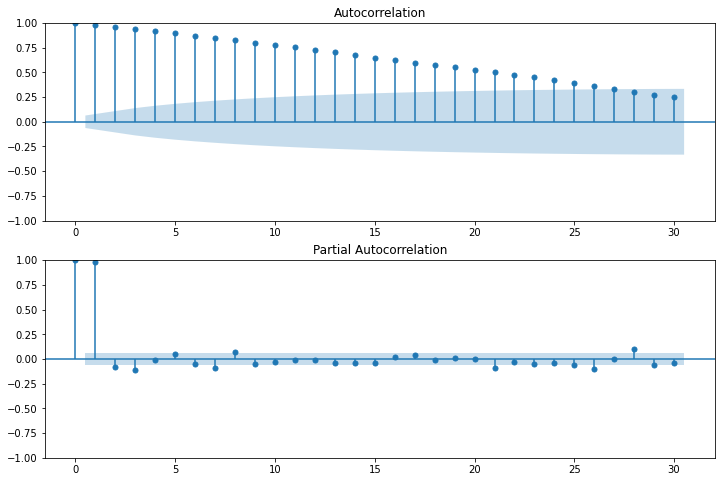

In [62]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal First Difference'].iloc[53:],lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal First Difference'].iloc[53:],lags=30,ax=ax2)

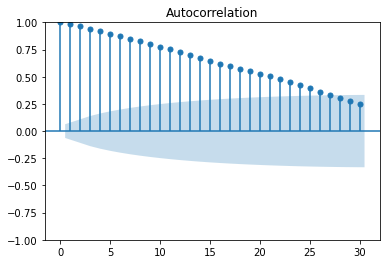

In [63]:
acf = plot_acf(data["Seasonal First Difference"].dropna())

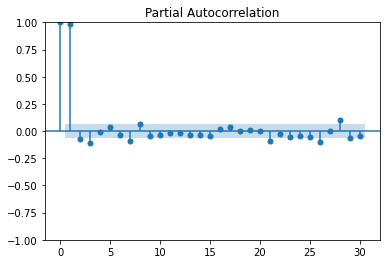

In [64]:
pacf = plot_pacf(data["Seasonal First Difference"].dropna())

# Forecasting 

<Figure size 432x288 with 0 Axes>

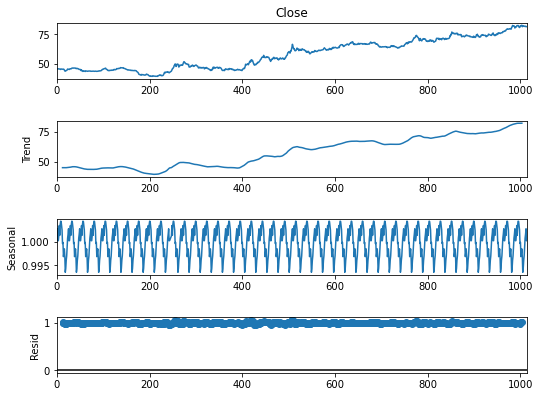

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative', period=24)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(8, 6)
fig.show()

In [66]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [67]:
from pmdarima.arima import auto_arima
model = auto_arima(data['Close'], seasonal=True, m=52, suppress_warnings=True)
print(model.order)

(2, 1, 0)


In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data["Close"], order=(2, 1, 0), 
                seasonal_order=(2, 1, 0, 52))  
fitted = model.fit() 
print(fitted.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1013
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 52)   Log Likelihood                -905.797
Date:                            Wed, 09 Aug 2023   AIC                           1821.594
Time:                                    23:39:51   BIC                           1845.929
Sample:                                         0   HQIC                          1830.861
                                           - 1013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0313      0.026      1.194      0.233      -0.020       0.083
ar.L2          0.0643      0.026   

In [69]:
predictions = fitted.predict(len(data), len(data)+60)
print(predictions)

1013    81.732810
1014    81.886994
1015    82.180323
1016    82.607757
1017    82.474247
          ...    
1069    84.906898
1070    85.402554
1071    85.520251
1072    85.830581
1073    85.687389
Name: predicted_mean, Length: 61, dtype: float64


In [70]:
# Create figure
fig = go.Figure()

# Add training data line plot
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Close'],
    mode='lines',
    name='Training Data',
    line=dict(color='blue')
))

# Add predictions line plot
fig.add_trace(go.Scatter(
    x=predictions.index,
    y=predictions,
    mode='lines',
    name='Predictions',
    line=dict(color='green')
))

fig.update_layout(
    title="INR Rate - Training Data and Predictions",
    xaxis_title="Date",
    yaxis_title="Close",
    legend_title="Data",
    width=900,
    height=600
)

pio.show(fig)

In [71]:
predictions = fitted.predict(len(data)-200, len(data))
print(predictions)

813     68.629365
814     69.053172
815     69.703182
816     70.837277
817     71.955499
          ...    
1009    81.670019
1010    81.361143
1011    82.221014
1012    81.697658
1013    81.732810
Name: predicted_mean, Length: 201, dtype: float64


In [72]:
# Create figure
fig = go.Figure()

# Add training data line plot
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Close'],
    mode='lines',
    name='Training Data',
    line=dict(color='blue')
))

# Add predictions line plot
fig.add_trace(go.Scatter(
    x=predictions.index,
    y=predictions,
    mode='lines',
    name='Predictions',
    line=dict(color='green')
))

fig.update_layout(
    title="INR Rate - Training Data and Predictions",
    xaxis_title="Date",
    yaxis_title="Close",
    legend_title="Data",
    width=2000,
    height=600
)

pio.show(fig)